# Capstone Two - Final Project Report

House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<u> id </u> : Individual notation for a house.<br>
<u> date </u> : The date the house was sold.<br>
<u> price </u> : Price of last sale of the home.<br>
<u> bedrooms </u> : Number of bedrooms in the house.<br>
<u> bathrooms </u> : Number of bathrooms in the house.<br>
<u> sqft_living </u> : Square footage of the home.<br>
<u> sqft_lot </u> : Square footage of the lot of the residence.<br>
<u> floors </u> : Total floors of the home.<br>
<u> waterfront </u> : Does the house have a view to a waterfront.<br>
<u> view </u> : Has the house been viewed?<br>
<u> condition </u> : The condition of the home.<br>
<u> grade </u> : Based on King County grading system, what is the overall grade given to the housing unit.<br>
<u> sqft_above </u> : The square footage of the house apart from basement.<br>
<u> sqft_basement </u> : Square footage of the basement.<br>
<u> yr_built </u> : The year the house was built.<br>
<u> yr_renovated </u> : THe year when house was renovated.<br>
<u> zipcode </u> : The zip code of the home.<br>
<u> lat </u> : The Latitude coordinate of the home.<br>
<u> long </u> : The Longitude coordinate of the home.<br>
<u> sqft_living15 </u> : Living room area in 2015(may or may not have affected the lotsize area).<br>
<u> sqft_lot15 </u> : LotSize area in 2015(implies-- some renovations).<br>

## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy
import pandas.testing as tm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

## Preliminary exploration of the data

In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Set the style for the various charts.
sns.set_style(style = 'whitegrid')

## Define various functions to produce charts as part of EDA

In [8]:
def plot_barh(data,column):
    return sns.countplot(y=column, data=df, palette="icefire")
def plot_bar(data,column):
    return sns.countplot(x=column, data=df, palette="icefire")
def plot_swarm(df,x,y):
    return sns.swarmplot(x=x, y=y, data=df, palette="icefire")
def plot_lm(df,x,y):
    return sns.lmplot(x=x, y=y, data=df,palette="icefire")
def plot_scatter(df,x,y,hue):
    return sns.scatterplot(data=df, x=x, y=y,hue=hue, palette="icefire")
def get_corrmat(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
    plt.title('Correlation Matrix of features', fontsize=8)
    plt.show()
def regression_eval(y_true,y_pred):
    variance_score= metrics.explained_variance_score(y_true, y_pred)
    mse= np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    r2= metrics.r2_score(y_true, y_pred)
    return print(f'Varianace score (Best possible score is 1.0, lower values are worse.) : {variance_score}\nrmse : {mse}\nR2 (Best possible score is 1.0): {r2}')

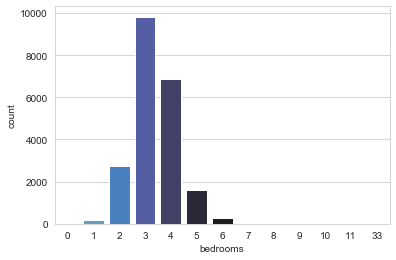

In [9]:
# How many bedrooms are in the various homes?
plot_bar(df,df['bedrooms'])

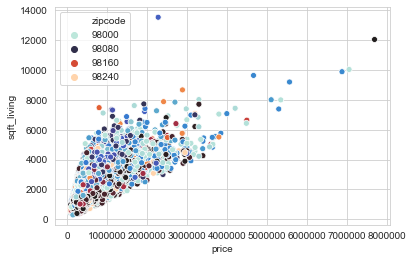

In [10]:
# Examining correlation between "price of home" and the "living square footage" according to zip code.
plot_scatter(df,df.price,df.sqft_living,df.zipcode)

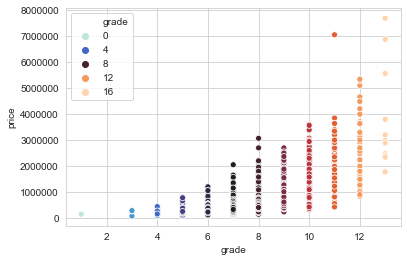

In [11]:
# Display the relationship between the price of a home and the grading of the home.
plot_scatter(df,df.grade,df.price,df.grade)

## Heatmap of the dataset

In [12]:
X = df.drop(['id','date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
Y = df['price'].copy()
Y = pd.DataFrame(Y)

In [13]:
X.corr()['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [14]:
X.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

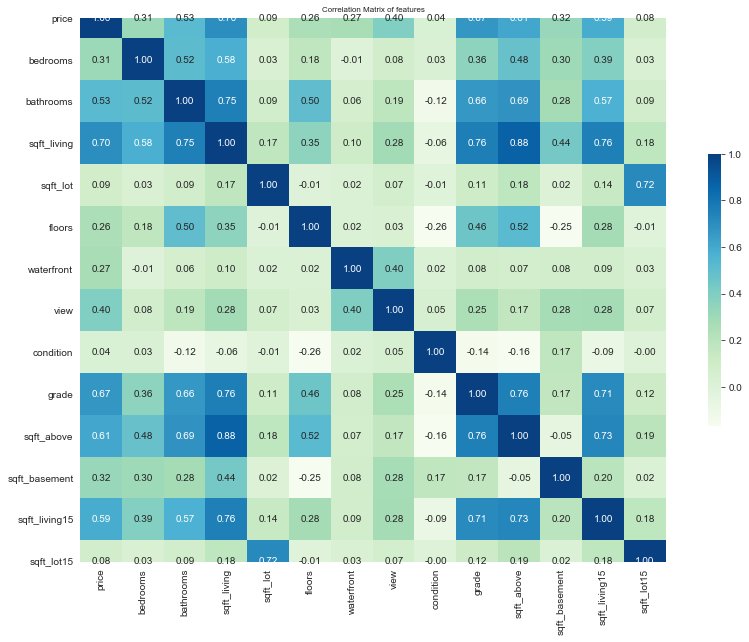

In [15]:
get_corrmat(X)

## XGBoost

In [16]:
import xgboost
from sklearn import metrics

In [17]:
model = xgboost.XGBRegressor(n_estimators = 50, learning_rate = 0.4, max_depth = 7)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [19]:
print(f'Train dataset has {X_train.shape[0]} rows & {X_train.shape[1]} columns')
print(f'Train dataset has {X_test.shape[0]} rows & {X_test.shape[1]} columns')

Train dataset has 14480 rows & 14 columns
Train dataset has 7133 rows & 14 columns


In [20]:
model= xgboost.XGBRegressor(n_estimators = 900, learning_rate = 0.05, max_depth = 5)
model.fit(X_train,y_train)
pred= model.predict(X_test)
regression_eval(y_test,pred)

Varianace score (Best possible score is 1.0, lower values are worse.) : 0.999636475208102
rmse : 7379.707111785109
R2 (Best possible score is 1.0): 0.9996362814561216


## Random Forest

In [21]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [22]:
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].apply(lambda date: date.year)
df["month"]=df["date"].apply(lambda date: date. month)
df.drop("date", axis = 1, inplace=True)
df.drop("zipcode", axis = 1, inplace=True)
def renovation(feature):
    if feature > 0:
        feature = 1
    return feature
df["yr_renovated"] = df["yr_renovated"].apply(renovation)

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [23]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.32305158203896067

In [28]:
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.27166936680438114

## Linear Regression

In [31]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [32]:
x = df[['sqft_living']]
y = df[['price']]

In [33]:
from sklearn.linear_model import LinearRegression
# Splitting the different X and Y into train groups and tests groups respectively
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0)

# Making use of the LinearRegression library and all of its calculations
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'SqFt Living vs Price (Train set)')

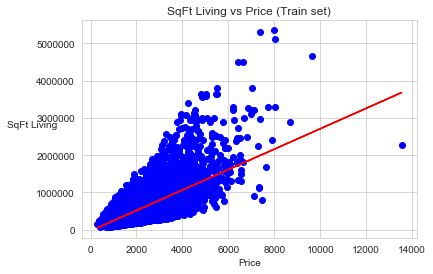

In [34]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Train set)")

Text(0.5, 1.0, 'SqFt Living vs Price (Test set)')

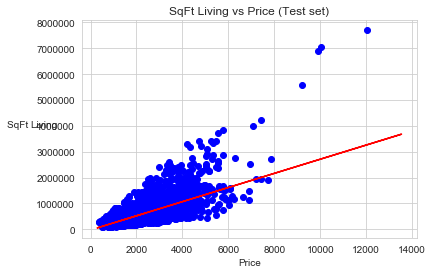

In [35]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Test set)")

In [36]:
r2_score(y_test, lin_reg.predict(X_test))  

0.5000063123558642

## Map the Longitude and Latitude

In [37]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


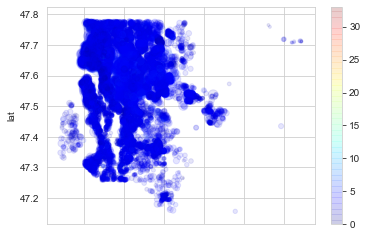

In [39]:
#import matplotlib.image as mpimg
min_x, max_x = df["long"].min(), df["long"].max()
min_y, max_y = df["lat"].min(), df["lat"].max()

p = df.plot(kind = "scatter",
                 x = "long",
                 y = "lat",
                 s = df["price"] * 0.00005,
                 alpha = 0.1,
                 c = df["bedrooms"],
                 cmap = "jet")

## Standardisation/Normalisation e.g Min Max Scaling

In [ ]:
filename = "kc_house_data.csv"
df = pd.read_csv(filename)

df = df.drop(['id','date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)

In [ ]:
df.info()

In [ ]:
from sklearn import preprocessing
# Normalize total_bedrooms column
x_array = np.array(df['bedrooms'])
normalized_X = preprocessing.normalize([x_array])

In [ ]:
df.head()

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Train set)")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
features =["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "grade", "sqft_basement"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [ ]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

In [ ]:
df.info()